In [2]:
import numpy as np
from qiskit import *
from math import pi
from qiskit import transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [3]:
backend = BasicAer.get_backend('unitary_simulator')

In [4]:
def Ramsey(omega,t):
    q = QuantumRegister(1)
    c = ClassicalRegister(1)
    circ=QuantumCircuit(q,c)
    circ.u(pi/2,0,0,q)
    circ.p(-omega*t,q)
    circ.u(pi/2,0,0,q)
    circ.draw()
    circ.barrier(range(1))
    circ.measure(q,c)
    backend = AerSimulator()
    qc_compiled = transpile(circ, backend)
    job_sim = backend.run(qc_compiled, shots=10000)
    result_sim = job_sim.result()
    counts = result_sim.get_counts(qc_compiled)
    return counts
    

In [ ]:
circ = Ramsey(pi,3)
circ.draw()

{'1': 5000, '0': 5000}


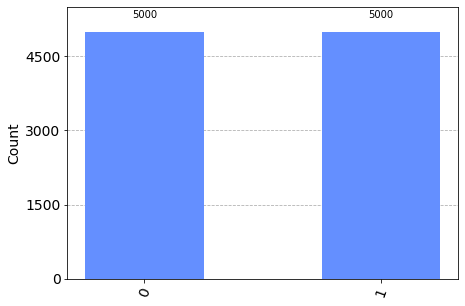

In [5]:
counts = Ramsey(pi/2,1)
print(counts)
plot_histogram(counts)

In [6]:
def Ramsey_measurement(omega):
    temps = np.linspace(0,5,1000)
    P=[]
    for k in temps:
        counts = Ramsey(omega,k)
        if len(counts) != 2:
            if counts == {'0':10000}:
                proba = 0
            else:
                proba = 1
        else:
            proba = counts['1'] / (counts['1'] + counts['0'])
        P.append(proba)
    return P


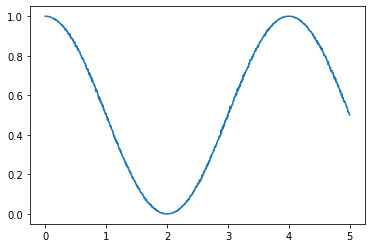

In [9]:
P = Ramsey_measurement(pi/2)
temps = np.linspace(0,5,1000)
plt.plot(temps, P)
plt.show()